In [25]:
import hwacctools.quantization.quant as q
from stim_lib.stimulus_gen import generate_qracc_inputs
import numpy as np
import plotly.express as px
import pandas as pd

df = pd.DataFrame

w,x,wx_outBits = generate_qracc_inputs(
    wDimX = 32, #nColumns
    wDimY = 128, #nRows
    xBatches = 10,
    xTrits = 1,
    outBits = 4,
    seed = 0,
    weight_mode = 'bipolar',
    col_symmetric=False
)

df(w @ x.T)

[STIM_GEN] Generating random weights


,0,1,2,3,4,5,6,7,8,9
0,5,-3,13,3,-6,-4,-2,-13,-18,8
1,9,-3,13,-9,-4,-4,12,-13,-4,10
2,-7,-11,11,-3,22,-6,-6,3,2,6
3,3,3,1,3,-2,-4,-8,13,0,-10
4,-5,-5,3,-3,2,-12,0,5,2,0
5,17,7,11,-1,12,8,16,-9,4,4
6,7,-3,-1,-17,4,4,12,3,6,-4
7,-1,-5,3,-3,-4,-2,-8,13,14,12
8,-7,-7,-13,1,16,2,2,1,-6,-2
9,-3,-19,-5,-7,8,0,6,-21,-6,10


### Problem 1

The AMS simulations vs this tend to produce such and such spreads

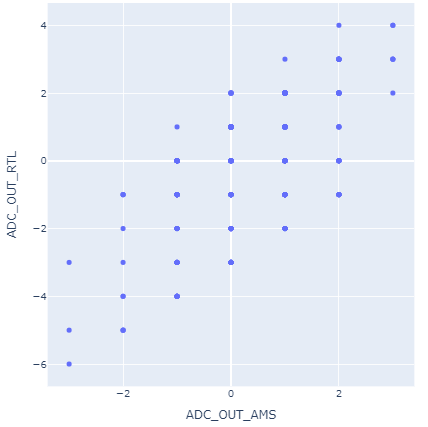

which is really bad.

Turns out, this is because I use binary weights in the reference RTL while the AMS is in bipolar mode.
Let's see if that actually turns out to be the same spread.

Findings
* w_bin and w_bip are the exact same data-wise. seed works.

In [45]:

w_bin,x_bin,wx_bin = generate_qracc_inputs(
    wDimX = 32, #nColumns
    wDimY = 128, #nRows
    xBatches = 10,
    xTrits = 1,
    outBits = 4,
    seed = 0,
    weight_mode = 'binary',
    col_symmetric=False
)

w_bip,x_bip,wx_bip = generate_qracc_inputs(
    wDimX = 32, #nColumns
    wDimY = 128, #nRows
    xBatches = 10,
    xTrits = 1,
    outBits = 4,
    seed = 0,
    weight_mode = 'bipolar',
    col_symmetric=False
)

assert (w_bin - (w_bip + 1)/2).any() == False

df(wx_bip), df(wx_bin)

[STIM_GEN] Generating random weights
[STIM_GEN] Generating random weights


(   0   1   2   3   4   5   6   7   8   9   ...  22  23  24  25  26  27  28  \
 0   0   0  -1   0  -1   1   0  -1  -1  -1  ...   0   0  -1  -1   0   0   0   
 1  -1  -1  -1   0  -1   0  -1  -1  -1  -2  ...  -1  -1   0  -1  -1  -1  -1   
 2   0   0   0   0   0   0  -1   0  -1  -1  ...  -2  -1   0   0  -1  -1  -1   
 3   0  -1  -1   0  -1  -1  -2  -1   0  -1  ...   0   0   0  -1   0   0   0   
 4  -1  -1   1  -1   0   0   0  -1   1   0  ...   0   0   1   0   0  -1   0   
 5  -1  -1  -1  -1  -1   0   0  -1   0   0  ...  -1   0  -1   0   0   1  -1   
 6  -1   0  -1  -1   0   1   0  -1   0   0  ...  -1   0   0   0  -2   0   0   
 7  -1  -1   0   0   0  -1   0   0   0  -2  ...  -1   0  -1  -1  -1  -1   0   
 8  -2  -1   0   0   0   0   0   0  -1  -1  ...   0   1  -1   0   0  -1   0   
 9   0   0   0  -1   0   0  -1   0  -1   0  ...   0   0   0   0   0   0  -1   
 
    29  30  31  
 0   1  -1   1  
 1   0   0   0  
 2  -1  -2  -1  
 3  -1  -1  -1  
 4  -1   0   0  
 5   0   0  -1  
 6   0  -1